In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interact_manual
df = pd.read_csv('../data/covid_data/CovidFaelle_Altersgruppe.csv', delimiter=';')

In [2]:
df.drop(columns=['BundeslandID', 'Anzahl', 'AnzahlGeheilt'], inplace=True)

In [3]:
df_barchart = df[((df['Bundesland'] == 'Niederösterreich') | (df['Bundesland'] == 'Wien')) & (df['Time'] == '10.11.2022 00:00:00')]

In [4]:
df_barchart.sort_values('AltersgruppeID', inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_2964\2667642807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barchart.sort_values('AltersgruppeID', inplace=True)


In [5]:
df_barchart['Altersgruppe'].replace(['<5', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64'], ['<65', '<65', '<65', '<65', '<65', '<65', '<65'], inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_2964\4135567002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barchart['Altersgruppe'].replace(['<5', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64'], ['<65', '<65', '<65', '<65', '<65', '<65', '<65'], inplace=True)


In [6]:
df_barchart.drop(columns=['AltersgruppeID', 'Time'], inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_2964\922317065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barchart.drop(columns=['AltersgruppeID', 'Time'], inplace=True)


In [7]:
df_barchart1 = df_barchart.groupby(['Altersgruppe', 'Bundesland', 'Geschlecht'], as_index = False, sort=False)[['AnzEinwohner','AnzahlTot']].sum()

In [8]:
df_barchart2 = df_barchart.groupby(['Altersgruppe', 'Bundesland'], as_index = False, sort=False)[['AnzEinwohner','AnzahlTot']].sum()

In [9]:
df_barchart2 = df_barchart2.assign(Geschlecht='M&W')

In [10]:
df_barchart_merged = df_barchart1.merge(df_barchart2, how='outer')

In [11]:
df_barchart_merged['Proportion of death/100'] = (df_barchart_merged['AnzahlTot'] / df_barchart_merged['AnzEinwohner']) * 100

In [12]:
df_barchart_merged.head(26)

,Altersgruppe,Bundesland,Geschlecht,AnzEinwohner,AnzahlTot,Proportion of death/100
0,<65,Niederösterreich,M,678752,294,0.043315
1,<65,Niederösterreich,W,665588,139,0.020884
2,<65,Wien,M,805612,307,0.038108
3,<65,Wien,W,797712,152,0.019054
4,65-74,Niederösterreich,M,81990,430,0.524454
5,65-74,Niederösterreich,W,91063,209,0.229511
6,65-74,Wien,M,71617,441,0.615776
7,65-74,Wien,W,88891,298,0.335242
8,75-84,Wien,M,49135,812,1.652590
9,75-84,Niederösterreich,M,56332,792,1.405950


In [13]:
@interact(gender=['M','W','M&W'])
def react(gender):
    colors = ["#1b9e77", "#7570b3"]
    sns_data = df_barchart_merged[(df_barchart_merged['Geschlecht'] == gender)]
    sns.set(rc = {'figure.figsize':(9,6)})
    sns.set_palette(sns.color_palette(colors))
    ax = sns.barplot(data=sns_data, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
    ax.set_facecolor('white')
    ax.set_axisbelow(False)
    ax.set_ylim(0, 5.5)
    ax.bar_label(ax.containers[1], fmt='%.2f')
    ax.bar_label(ax.containers[0], fmt='%.2f')
    ax.grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
    plt.xlabel('Age  group', fontsize=14)
    plt.ylabel('Number of deaths per 100 inhabitants of each age group', fontsize=14)
    plt.title('Total number of COVID-19 deaths per 100 inhabitants until 10.11.2022 by age group', fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.legend(loc = 'upper left', fontsize=16, facecolor='white', labels=['Lower Austria', 'Vienna'])
    leg = plt.legend
    plt.show()

interactive(children=(Dropdown(description='gender', options=('M', 'W', 'M&W'), value='M'), Output()), _dom_cl…

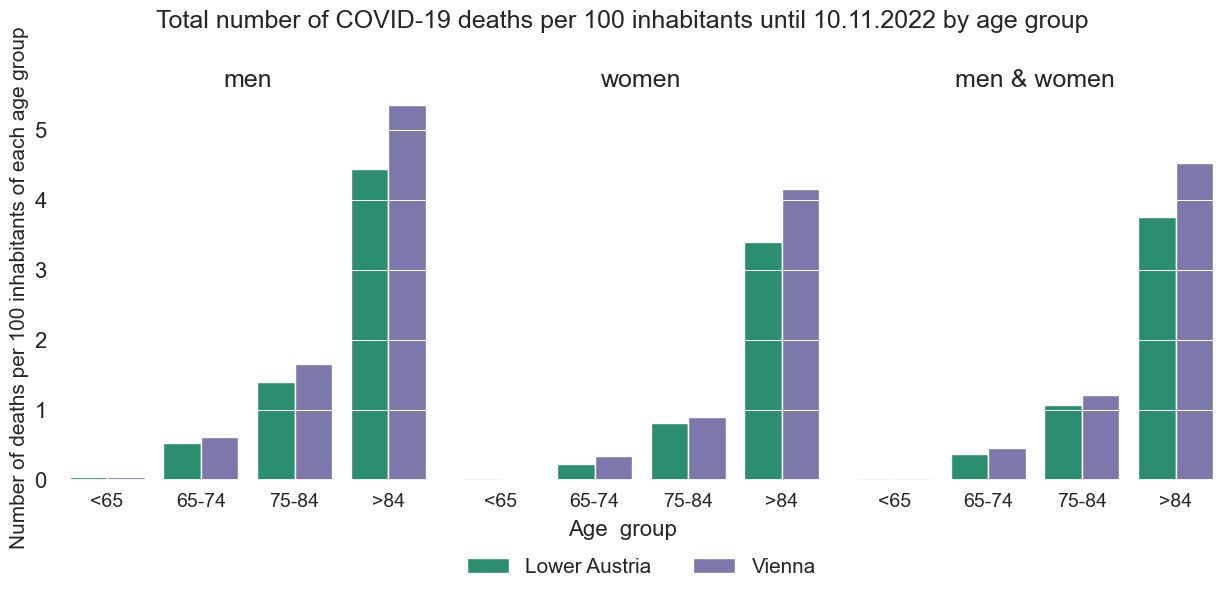

In [14]:
sns_data_M = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'M')]
sns_data_W = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'W')]
sns_data_MandW = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'M&W')]
colors = ["#1b9e77", "#7570b3"]
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(wspace=0.05)
fig.suptitle('Total number of COVID-19 deaths per 100 inhabitants until 10.11.2022 by age group', fontsize=18, y=1.05)
fig.supxlabel('Age  group', fontsize=16, y=-0.01)

#men
sns.barplot(ax=axes[0], data=sns_data_M, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[0].set_facecolor('white')
axes[0].set_axisbelow(False)
axes[0].set_ylim(0, 5.5)
axes[0].yaxis.set_tick_params(labelsize = 16)
axes[0].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[0].set_title('men', fontsize=18)
axes[0].set_ylabel('Number of deaths per 100 inhabitants of each age group', fontsize=15)
axes[0].get_legend().remove() 
axes[0].set_xlabel(None)
axes[0].xaxis.set_tick_params(labelsize = 14)

#women
sns.barplot(ax=axes[1], data=sns_data_W, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[1].set_facecolor('white')
axes[1].set_axisbelow(False)
axes[1].set_ylim(0, 5.5)
axes[1].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[1].set_title('women', fontsize=18)
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].legend(facecolor='white', labels=['Lower Austria', 'Vienna'])
sns.move_legend(axes[1], "lower center", ncol=2, title=None, frameon=False, bbox_to_anchor=(0.5, -0.3), fontsize=15)
axes[1].xaxis.set_tick_params(labelsize = 14)

#both
sns.barplot(ax=axes[2], data=sns_data_MandW, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[2].set_facecolor('white')
axes[2].set_axisbelow(False)
axes[2].set_ylim(0, 5.5)
axes[2].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[2].set_title('men & women', fontsize=18)
axes[2].set_ylabel(None)
axes[2].set_xlabel(None)
axes[2].get_legend().remove() 
axes[2].xaxis.set_tick_params(labelsize = 14)

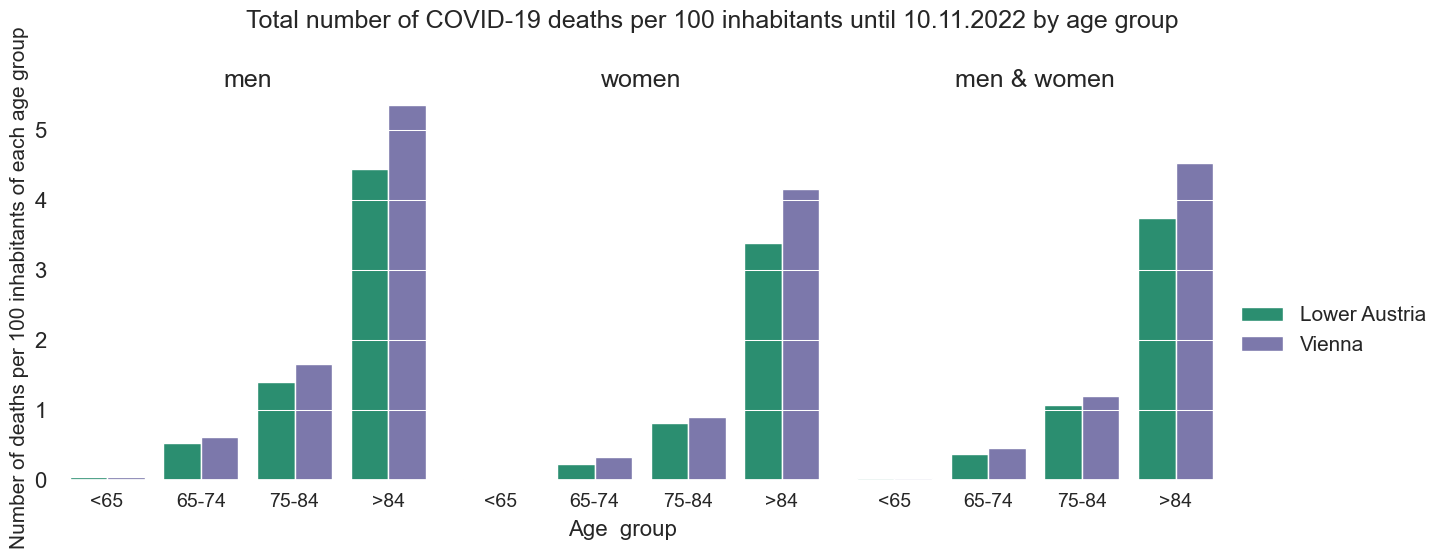

In [15]:
sns_data_M = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'M')]
sns_data_W = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'W')]
sns_data_MandW = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'M&W')]
colors = ["#1b9e77", "#7570b3"]
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(wspace=0.05)
fig.suptitle('Total number of COVID-19 deaths per 100 inhabitants until 10.11.2022 by age group', fontsize=18, y=1.05, x=0.56)
fig.supxlabel('Age  group', fontsize=16, y=-0.01)

#men
sns.barplot(ax=axes[0], data=sns_data_M, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[0].set_facecolor('white')
axes[0].set_axisbelow(False)
axes[0].set_ylim(0, 5.5)
axes[0].yaxis.set_tick_params(labelsize = 16)
axes[0].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[0].set_title('men', fontsize=18)
axes[0].set_ylabel('Number of deaths per 100 inhabitants of each age group', fontsize=15)
axes[0].get_legend().remove() 
axes[0].set_xlabel(None)
axes[0].xaxis.set_tick_params(labelsize = 14)

#women
sns.barplot(ax=axes[1], data=sns_data_W, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[1].set_facecolor('white')
axes[1].set_axisbelow(False)
axes[1].set_ylim(0, 5.5)
axes[1].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[1].set_title('women', fontsize=18)
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].get_legend().remove() 
axes[1].xaxis.set_tick_params(labelsize = 14)

#both
sns.barplot(ax=axes[2], data=sns_data_MandW, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[2].set_facecolor('white')
axes[2].set_axisbelow(False)
axes[2].set_ylim(0, 5.5)
axes[2].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[2].set_title('men & women', fontsize=18)
axes[2].set_ylabel(None)
axes[2].set_xlabel(None)
axes[2].xaxis.set_tick_params(labelsize = 14)
axes[2].legend(facecolor='white', labels=['Lower Austria', 'Vienna'])
sns.move_legend(axes[2], title=None, frameon=False, bbox_to_anchor=(1.0, 0.5), loc=0, fontsize=15)

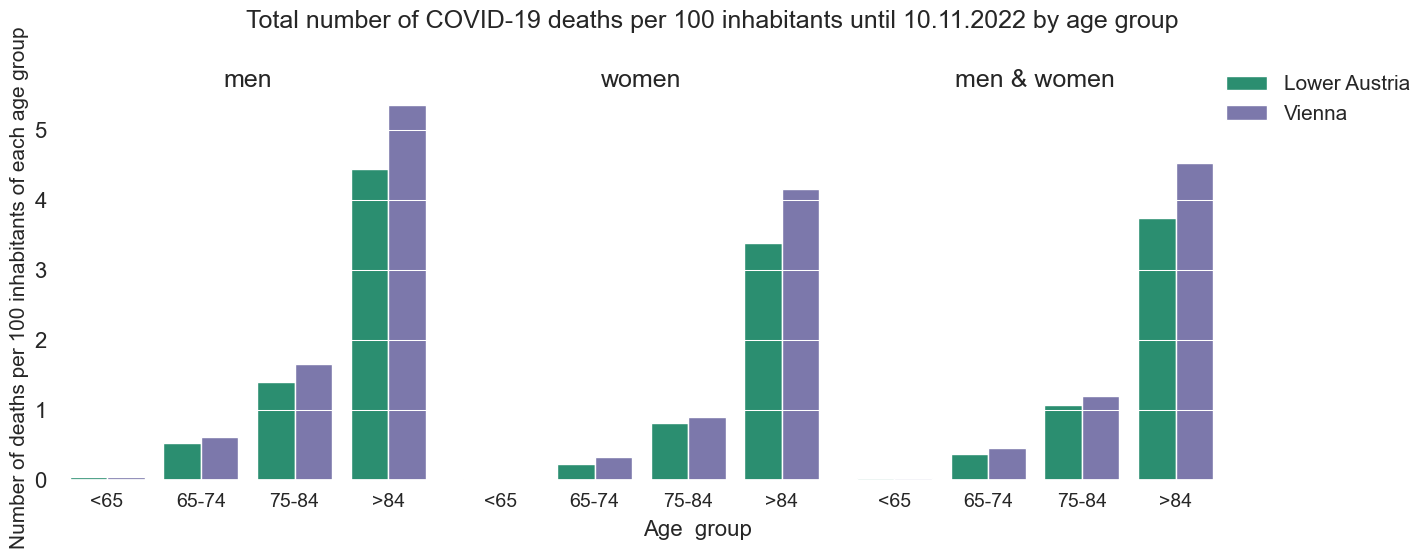

In [22]:
sns_data_M = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'M')]
sns_data_W = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'W')]
sns_data_MandW = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'M&W')]
colors = ["#1b9e77", "#7570b3"]
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(wspace=0.05)
fig.suptitle('Total number of COVID-19 deaths per 100 inhabitants until 10.11.2022 by age group', fontsize=18, y=1.05, x=0.56)
fig.supxlabel('Age  group', fontsize=16, y=-0.01, x = 0.55)

#men
sns.barplot(ax=axes[0], data=sns_data_M, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[0].set_facecolor('white')
axes[0].set_axisbelow(False)
axes[0].set_ylim(0, 5.5)
axes[0].yaxis.set_tick_params(labelsize = 16)
axes[0].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[0].set_title('men', fontsize=18)
axes[0].set_ylabel('Number of deaths per 100 inhabitants of each age group', fontsize=15)
axes[0].get_legend().remove() 
axes[0].set_xlabel(None)
axes[0].xaxis.set_tick_params(labelsize = 14)

#women
sns.barplot(ax=axes[1], data=sns_data_W, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[1].set_facecolor('white')
axes[1].set_axisbelow(False)
axes[1].set_ylim(0, 5.5)
axes[1].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[1].set_title('women', fontsize=18)
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].get_legend().remove() 
axes[1].xaxis.set_tick_params(labelsize = 14)

#both
sns.barplot(ax=axes[2], data=sns_data_MandW, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
axes[2].set_facecolor('white')
axes[2].set_axisbelow(False)
axes[2].set_ylim(0, 5.5)
axes[2].grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
axes[2].set_title('men & women', fontsize=18)
axes[2].set_ylabel(None)
axes[2].set_xlabel(None)
axes[2].xaxis.set_tick_params(labelsize = 14)
axes[2].legend(facecolor='white', labels=['Lower Austria', 'Vienna'])
sns.move_legend(axes[2], title=None, frameon=False, bbox_to_anchor=(1.55, 1.1), loc=0, fontsize=15)

#plt.savefig('Angelika_03.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

In [ ]:
sea = sns.FacetGrid(df_barchart_merged, col = 'Geschlecht', hue='Bundesland')
sea.map(sns.barplot, "Altersgruppe", "Proportion of death/100")

In [ ]:
colors = ["#1b9e77", "#7570b3"]
sns.set_style('whitegrid')
g = sns.catplot(x='Altersgruppe', y='Proportion of death/100', col= 'Geschlecht', hue='Bundesland', data=df_barchart_merged, kind='bar', palette = colors)
g.set_axis_labels('Age  group', 'Number of deaths per 100 inhabitants of each age group')
g.set_titles('men', 'women', 'men & women')
#g.set_axisbelow(False)
#g.set_ylim(0, 5.5)
#ax.grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
#plt.xlabel('Age  group', fontsize=14)
#plt.ylabel('Number of deaths per 100 inhabitants of each age group', fontsize=14)
#plt.title('Total number of COVID-19 deaths per 100 inhabitants until 10.11.2022 by age group', fontsize=14)
    #plt.yticks(fontsize=14)
    #plt.xticks(fontsize=12)
#plt.legend(fontsize=16, facecolor='white', labels=['Lower Austria', 'Vienna'])

jhsdhj

In [ ]:
for gender in ['M', 'W', 'M&W']:
    

sns_data_M = df_barchart_merged[(df_barchart_merged['Geschlecht'] == gender]
sns_data_W = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'W')]
sns_data_MandW = df_barchart_merged[(df_barchart_merged['Geschlecht'] == 'M&W')]


colors = ["#1b9e77", "#7570b3"]
sns_data = df_barchart_merged[(df_barchart_merged['Geschlecht'] == gender)]
sns.set(rc = {'figure.figsize':(9,6)})
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(data=sns_data, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
ax.set_facecolor('white')
ax.set_axisbelow(False)
ax.set_ylim(0, 5.5)
ax.bar_label(ax.containers[1], fmt='%.2f')
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
plt.xlabel('Age  group', fontsize=14)
plt.ylabel('Number of deaths per 100 inhabitants of each age group', fontsize=14)
plt.title('Total number of COVID-19 deaths per 100 inhabitants until 10.11.2022 by age group', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.legend(loc = 'upper left', fontsize=16, facecolor='white', labels=['Lower Austria', 'Vienna'])
leg = plt.legend
plt.show()

In [ ]:
for (gender, title, i) in zip(['M', 'W', 'M&W'], ['men', 'women', 'men & women'], [1, 2, 3]):
    fig = plt.subplot(1, 3, i)
    ax = sns.barplot(data=df_barchart_merged[(df_barchart_merged['Geschlecht'] == gender)], x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
    ax.set_facecolor('white')
    ax.set_axisbelow(False)
    ax.set_ylim(0, 5.5)
    ax.grid(visible=True, axis='y', which='major', color='white', linewidth=0.75)
    plt.xlabel('Age  group', fontsize=14)
    #plt.ylabel('Number of deaths per 100 inhabitants of each age group', fontsize=12)
    plt.title(title, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    #plt.show()
    plt.legend(loc = 'upper left', fontsize=10, facecolor='white', labels=['Lower Austria', 'Vienna'])
plt.show()  
#fig.suptitle('This is a somewhat long figure title', fontsize=16)